In [1]:
import numpy as np
from matplotlib import pyplot as plt
from torch.utils.data import DataLoader

from model.utils.transfroms import get_train_transform, get_valid_transform, get_test_transform
from model.dataset import CustomDataset

HOME = ''
HOME_DIR = f'../Data/ChEMBL/OCR'
DATAFRAME_LIST = dict(train=f'data/chembl_31_smiles_train.csv',
                        val=f'data/chembl_31_smiles_val.csv',
                        test=f'data/chembl_31_smiles_test.csv')

def collate_fn(batch):
    return tuple(zip(*batch))

ocr_dataset = CustomDataset(
        data_df=DATAFRAME_LIST['val'],
        # mode='val',
        mode='test',
        # transforms=get_valid_transform(),
        # transforms=get_train_transform(),
        transforms=get_test_transform(),
        dir_path=HOME_DIR,
    )


/home/doodleduck/miniconda3/envs/rdkit310/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Finished 'CustomDataset' in 0.0025 secs


In [ ]:
image, gt_shr, gt_shr_mask, gt_thr, gt_thr_mask = ocr_dataset[14]

fig, ax = plt.subplots(1, 5, figsize=(24, 6))
ax[0].imshow(image[0])
ax[1].imshow(gt_shr)
ax[2].imshow(gt_shr_mask)
ax[3].imshow(gt_thr)
ax[4].imshow(gt_thr_mask)

In [2]:
import torch
from torch import Tensor

from model.dbnet import DBNet
from model.loss import DBLoss

model = DBNet(
        inner_channels=128,
        out_channels=64,
        head_in_channels=320,
        test=True,
    )

model.load_state_dict(torch.load('model_weights.v9.mbv3s.final.pth'), strict=False)
# model.cpu()
model.eval()

idx = 0

In [ ]:
# image, gt_shr, gt_shr_mask, gt_thr, gt_thr_mask = ocr_dataset[idx]
image = ocr_dataset[idx]
# image = ocr_dataset[54]
image = image[None,]

x = model(image)
print(idx)

fig, ax = plt.subplots(2, 4, figsize=(24, 10))
ax[0, 0].imshow(image[0, 0].detach().numpy())
# ax[0, 1].imshow(x[0, 0].detach().numpy())
# ax[0, 2].imshow(x[0, 1].detach().numpy())
# ax[0, 3].imshow(x[0, 2].detach().numpy())
ax[0, 1].imshow(x[0, 1].detach().numpy())
ax[0, 2].imshow(x[0, 2].detach().numpy())
ax[0, 3].imshow(x[0, 3].detach().numpy())
ax[1, 0].imshow(x[0, 4].detach().numpy())
ax[1, 1].imshow(x[0, 5].detach().numpy())
ax[1, 2].imshow(x[0, 6].detach().numpy())
ax[1, 3].imshow(x[0, 7].detach().numpy())
# ax[1, 0].imshow(gt_shr.detach().numpy())
# ax[1, 1].imshow(gt_shr.detach().numpy() == 5)
# ax[1, 2].imshow(gt_shr.detach().numpy() == 6)
# ax[1, 3].imshow(gt_shr.detach().numpy() == 7)

idx += 1

In [ ]:
# image, gt_shr, gt_shr_mask, gt_thr, gt_thr_mask = ocr_dataset[idx]
image = ocr_dataset[idx]
# image = Tensor(image[None, None, :, :])
image = image[None,]

x = model(image)

fig, ax = plt.subplots(2, 4, figsize=(24, 10))
ax[0, 0].imshow(image[0, 0].detach().numpy())
# ax[0, 1].imshow(x[0, 0].detach().numpy())
# ax[0, 2].imshow(x[0, 3].detach().numpy())
ax[0, 1].imshow(x[0, 4].detach().numpy())
ax[0, 2].imshow(x[0, 5].detach().numpy())
ax[0, 3].imshow(x[0, 6].detach().numpy())
ax[1, 0].imshow(x[0, 7].detach().numpy())
ax[1, 1].imshow(x[0, 8].detach().numpy())
ax[1, 2].imshow(x[0, 9].detach().numpy())
ax[1, 3].imshow(x[0, 10].detach().numpy())

idx += 1

In [3]:
import torch
from torch import nn

from emnist import NeuralNetwork

char_model = NeuralNetwork()
char_model.load_state_dict(torch.load("model_weights.emnist.pth"))
char_model.eval()

NeuralNetwork(
  (conv_stack): Sequential(
    (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
    (4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): Conv2d(128, 256, kernel_size=(2, 2), stride=(2, 2))
    (7): Conv2d(256, 256, kernel_size=(2, 2), stride=(1, 1))
    (8): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): AdaptiveAvgPool2d(output_size=(1, 1))
  )
  (fc): Conv2d(256, 512, kernel_size=(1, 1), stride=(1, 1))
  (fc1): Conv2d(512, 62, kernel_size=(1, 1), stride=(1, 1))
)

In [4]:
eminst_class = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
convT2d = torch.nn.ConvTranspose2d(320, 320, 2, 2)

In [324]:
import cv2
from shapely.geometry import Polygon
import numpy as np

from math import ceil



def sqrt_einsum(a, b):
    a_min_b = a - b
    return np.sqrt(np.einsum("i,i->", a_min_b, a_min_b))

def cal_avg_dist(contours):
    _length = []
    limit = 0
    for _polygon in contours:
        limit += 1
        if limit == 30:
            break
        _length.append(sqrt_einsum(_polygon.max(axis=0)[0], _polygon.min(axis=0)[0]))
    _length = np.array(_length, dtype=np.float16)
    return _length.mean()

# def chk_pair(dist_arr):
#     _, _dist_arr = np.where(dist_arr == 1)
#     if np.all(dist_arr.sum(axis=1) == 2):
#         return _dist_arr.reshape(-1, 2).astype(int)
#     else:
#         plt.imshow(dist_arr)
#         raise ValueError

In [325]:
image = ocr_dataset[54]
# image, gt_shr, gt_shr_mask, gt_thr, gt_thr_mask = ocr_dataset[2]
image = image[None,]

neck_out = model.neck(image)
out = model.head(neck_out)
out = out.detach().cpu().numpy()

x = model.head.categorize[:-2](neck_out)
x = convT2d(x)
x = x.detach().numpy()

# idx = 0

In [414]:
def get_pair(array1, array2):
    _dist = np.abs(array1[None, :, :] - array2[:, None, :]).max(axis=2)
    return _dist.min(axis=0).argsort()[:2]

def _buffered_polygon_coords(polygon):
    if not isinstance(polygon, Polygon):
        polygon = Polygon(polygon)
    area = polygon.area
    peri = polygon.length
    buffer_polygon = polygon.buffer(distance=2, cap_style=2, join_style=2)
    return np.array(buffer_polygon.exterior.coords)

def extreme_points(contour):
    extreme_left = tuple(contour[contour[:, :, 0].argmin()][0])
    extreme_right = tuple(contour[contour[:, :, 0].argmax()][0])
    extreme_top = tuple(contour[contour[:, :, 1].argmin()][0])
    extreme_bottom = tuple(contour[contour[:, :, 1].argmax()][0])
    return extreme_left, extreme_right, extreme_top, extreme_bottom

def get_min_max_polygon(_polygon):
    max_x, max_y = _polygon.max(axis=0)[0]
    min_x, min_y = _polygon.min(axis=0)[0]
    _max = [ceil(max_x)+1, ceil(max_y)+1]
    _min = [int(min_x)-1, int(min_y)]
    return [_max, _min]


In [443]:
def denormalize(x, mean=[0.5], std=[0.22]):
    # 3, H, W, B
    ten = x.clone()
    for t, m, s in zip(ten, mean, std):
        t.mul_(s).add_(m)
    # B, 3, H, W
    return torch.clamp(ten, 0, 1).detach().numpy()


def predict_atom_character(char_pos, img_size: tuple = (14, 14)):

    import torch.nn.functional as F

    pred_char_list = []
    pred_img_char_list = []

    for i in char_pos:
        _max, _min = i
        _image = image[:, :, _min[1]:_max[1], _min[0]:_max[0]]
        _image = F.pad(_image, (3,3,3,3), value=2.2727)
        _image = F.interpolate(_image, size=img_size, mode="bilinear")
        pred = eminst_class[char_model(_image).argmax()]
        if pred in ['0', 'Q']:
            pred = 'O'
        elif pred in ['A']:
            pred = 'H'
    
        pred_char_list.append(pred)
        pred_img_char_list.append(denormalize(_image[0, 0]))

    return pred_char_list, pred_img_char_list


def chunk_char(array, cutoff):
    _dist_arr = np.abs(array[None, :, :] - array[:, None, :]).max(axis=2)
    _dist_arr[np.triu_indices(_dist_arr.shape[0])] = 999
    _dist = np.where(_dist_arr < cutoff * 1.2)
    _dist = np.stack(_dist, axis=1)
    return _dist

def get_mol_conn_info(out):

    contours = {}
    char_pos = []
    for idx in range(1, 3):
        _contours, _ = cv2.findContours(255*np.array(out[0][idx] > 0.2, dtype=np.uint8), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
        _ctrs = []
        if _contours.__len__() == 0:
            contours[idx] = None
            continue
        for _polygon in _contours:
            if _polygon.shape.__len__() > 1:
                rect = cv2.minAreaRect(_polygon)
                (x, y), (w, h), ang = rect
                if w * h > 9:
                    box = cv2.boxPoints(rect)
                    _ctrs.append([x, y])
                    if idx == 2:
                        char_pos.append(get_min_max_polygon(_polygon))
        contours[idx] = np.array(_ctrs, dtype=np.float16)

    b_pair = {}
    polygons = {}
    avg_b_dist = 0
    bond_length = []
    for idx in range(3, 8):
        _contours, _ = cv2.findContours(255*np.array(out[0][idx] > 0.2, dtype=np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        _ctrs = []
        _poly = []
        if _contours.__len__() == 0:
        # contours[idx] = None
            polygons[idx] = None
            continue
        for _polygon in _contours:
        # _polygon = _polygon.squeeze()
            if cv2.contourArea(_polygon) > 1:
                rect = cv2.minAreaRect(_polygon)
                (x, y), (w, h), ang = rect
                if w * h > 9:
                    box = cv2.boxPoints(rect)
                    _ctrs.append([x, y])
                    _poly.append(box)
                    bond_length.append([w, h])

    # contours[idx] = np.array(_ctrs, dtype=np.float16)
        polygons[idx] = np.array(_poly, dtype=np.float16)

    bond_avg_length = np.array(bond_length, dtype=np.float16).max(axis=1).mean()
    chunked_char = chunk_char(contours[2], bond_avg_length)

    heavy_atom = np.ones(contours[2].__len__(), dtype=np.uint8)

    pred_char_list, pred_img_char_list = predict_atom_character(char_pos)

    for i in chunked_char:
        a = pred_char_list[i[0]]
        b = pred_char_list[i[1]]
        if a in ['H', '2']:
            heavy_atom[i[0]] = 0
        elif b in ['H', '2']:
            heavy_atom[i[1]] = 0

    contours[2] = contours[2][np.where(heavy_atom == 1)]
    pred_heavy_char_list = np.array(pred_char_list)[np.where(heavy_atom == 1)]

    pts = np.concatenate([contours[1], contours[2]], axis=0)

    for idx in range(3, 8):
        if polygons[idx] is not None:
            b_pair[idx] = []
            for _polygon in polygons[idx]:
                b_pair[idx].append(get_pair(pts, _polygon))

    return contours, b_pair, pred_heavy_char_list, pred_char_list, pred_img_char_list

def get_mol(contours, pred_char_list, b_pair):

    mol = Chem.RWMol()

    a_idx = 0
    for _ in contours[1]:
        atom = Chem.Atom(6)
        mol.AddAtom(atom)
        a_idx += 0

    for _ in pred_char_list:
        atom = Chem.Atom(a_list[_])
        mol.AddAtom(atom)
        a_idx += 0

    b_idx = 0
    chiral_b_idx = {}
    for idx in b_pair:
        for i, j in b_pair[idx]:
            i = int(i)
            j = int(j)
            mol.AddBond(i, j, order=b_type_list[idx])
            if idx > 5:
                _bond = mol.GetBondWithIdx(b_idx)
                _bond.SetBondDir(b_dir_list[idx])
                chiral_b_idx[b_idx] = [i, j]
            b_idx += 1


    conf = Chem.Conformer(mol.GetNumAtoms())
    mol.AddConformer(conf)

    Chem.SanitizeMol(mol)
    # rdDepictor.Compute2DCoords(mol)
    Chem.AssignChiralTypesFromBondDirs(mol)

    if chiral_b_idx.__len__() != 0:
        for _idx in chiral_b_idx:
            _b = mol.GetBondWithIdx(_idx)
            _bDir = _b.GetBondDir()
            _aI = _b.GetBeginAtom()
            _aJ = _b.GetEndAtom()
            type_bool1 = _aI.GetChiralTag() == Chem.ChiralType.CHI_UNSPECIFIED
            type_bool2 = _aJ.GetChiralTag() == Chem.ChiralType.CHI_UNSPECIFIED
            if type_bool1 and type_bool2:
                j, i = chiral_b_idx[_idx]
                mol.RemoveBond(j, i)
                mol.AddBond(i, j, order=Chem.BondType.SINGLE)
                _b = mol.GetBondWithIdx(b_idx-1)
                _b.SetBondDir(_bDir)

    Chem.AssignChiralTypesFromBondDirs(mol)

    # Chem.DetectBondStereochemistry(mol)
    # Chem.AssignAtomChiralTagsFromStructure(mol)
    # Chem.AssignStereochemistry(mol)

    Chem.SanitizeMol(mol)
    smi = Chem.MolToSmiles(mol)
    mol = Chem.MolFromSmiles(smi)
    return mol

In [67]:
from PIL import Image
from datetime import datetime

def save_image(img, pred, idx):
    now = datetime.now()
    cur_time_str = now.strftime("%d%m%Y_%H%M%S")

    img = np.array(img*255, dtype=np.uint8)
    pil_image = Image.fromarray(img)
    pil_image.save(f"tmp_img/{cur_time_str}_{idx}_{pred}.png")


In [175]:
_idx = 9

In [451]:
image = ocr_dataset[_idx]
# image, gt_shr, gt_shr_mask, gt_thr, gt_thr_mask = ocr_dataset[2]
image = image[None,]

neck_out = model.neck(image)
out = model.head(neck_out)
out = out.detach().cpu().numpy()

contours, b_pair, pred_heavy_char_list, pred_char_list, pred_img_char_list = get_mol_conn_info(out)

for idx, img in enumerate(pred_img_char_list):
    save_image(img, pred_char_list[idx], idx)

_idx += 1

get_mol(contours, pred_heavy_char_list, b_pair)

KeyError: 'a'

In [174]:
# pred_char_list
for idx, img in enumerate(pred_img_char_list):
    save_image(img, pred_char_list[idx], idx)

In [170]:
for _polygon in _contours:
    if _polygon.shape.__len__() > 1:
        rect = cv2.minAreaRect(_polygon)
        (x, y), (w, h), ang = rect
        print(w*h)

90.0
63.0
63.0
70.0
63.0
63.0
81.0


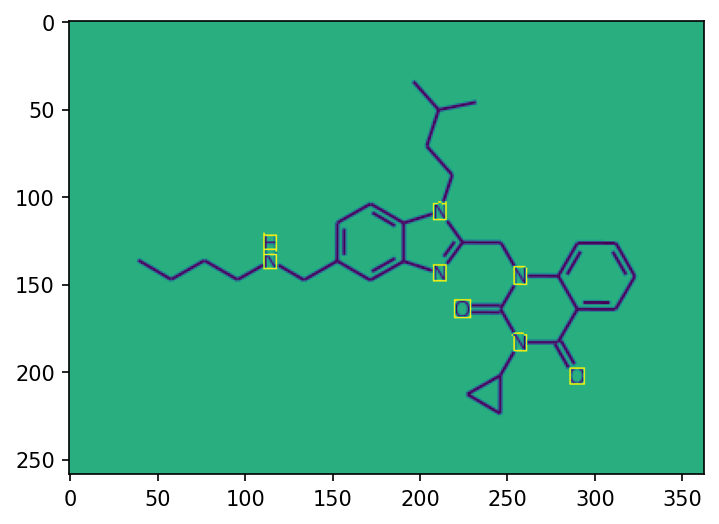

In [452]:
fig, ax = plt.subplots(1, 1, dpi=150)
img = image[0, 0].detach().numpy().copy()
_contours, _ = cv2.findContours(255*np.array(out[0][2] > 0.2, dtype=np.uint8), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
tmp_contours = []
for _polygon in _contours:
    if _polygon.shape.__len__() > 1:
        rect = cv2.minAreaRect(_polygon)
        (x, y), (w, h), ang = rect
        if w * h > 9:
            tmp_contours.append(_polygon)
ax.imshow(cv2.drawContours(img, tmp_contours, -1, (5), 1))

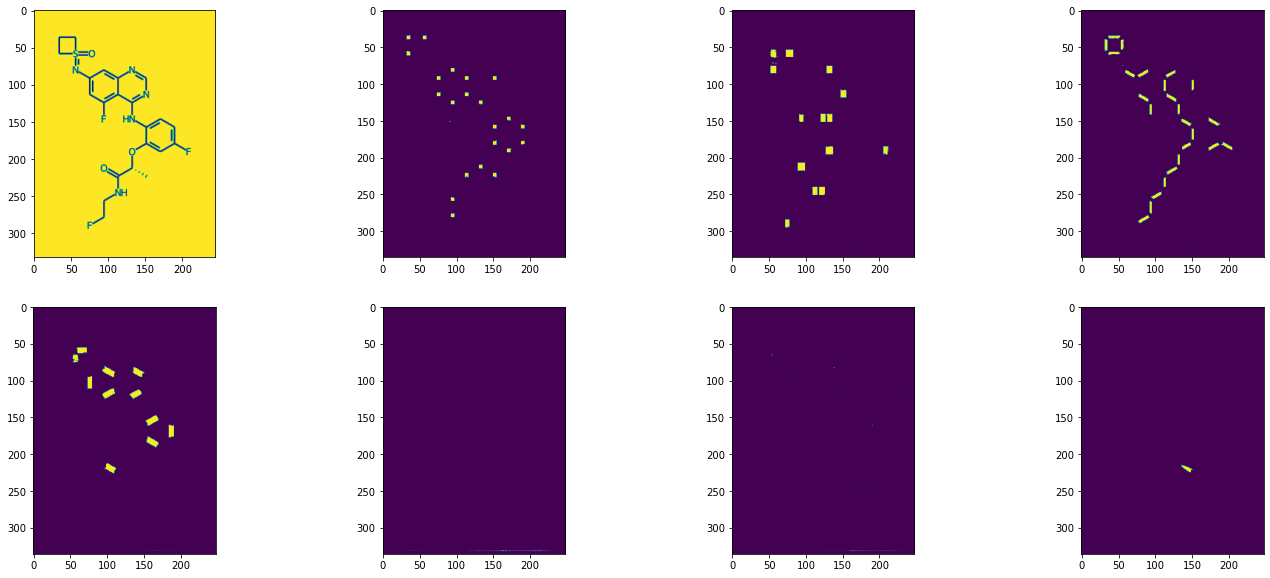

In [450]:
fig, ax = plt.subplots(2, 4, figsize=(24, 10))
ax[0, 0].imshow(image[0, 0].detach().numpy())
# ax[0, 1].imshow(x[0, 0].detach().numpy())
# ax[0, 2].imshow(x[0, 3].detach().numpy())
ax[0, 1].imshow(out[0, 1])
ax[0, 2].imshow(out[0, 2])
ax[0, 3].imshow(out[0, 3])
ax[1, 0].imshow(out[0, 4])
ax[1, 1].imshow(out[0, 5])
ax[1, 2].imshow(out[0, 6])
ax[1, 3].imshow(out[0, 7])

idx += 1

In [9]:
import rdkit
from rdkit import Chem, rdBase
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import rdDistGeom, rdDepictor, rdCoordGen

IPythonConsole.drawOptions.addAtomIndices = False

In [382]:
b_type_list = {
    3: Chem.BondType.SINGLE,
    4: Chem.BondType.DOUBLE,
    5: Chem.BondType.TRIPLE,
    6: Chem.BondType.SINGLE,
    7: Chem.BondType.SINGLE,
}
b_dir_list = {
    6: Chem.BondDir.BEGINWEDGE,
    7: Chem.BondDir.BEGINDASH,
}

a_list = {
    'H': 1,
    'C': 6,
    'N': 7,
    'O': 8,
    'F': 9,
    'E': 9,
    'R': 9,
    'S': 16,
}

mol = Chem.RWMol()

a_idx = 0
for _ in contours[1]:
    atom = Chem.Atom(6)
    mol.AddAtom(atom)
    a_idx += 0

for _ in pred_char_list:
    atom = Chem.Atom(a_list[_])
    mol.AddAtom(atom)
    a_idx += 0

b_idx = 0
chiral_b_idx = {}
for idx in b_pair:
    for i, j in b_pair[idx]:
        i = int(i)
        j = int(j)
        mol.AddBond(i, j, order=b_type_list[idx])
        if idx > 5:
            _bond = mol.GetBondWithIdx(b_idx)
            _bond.SetBondDir(b_dir_list[idx])
            chiral_b_idx[b_idx] = [i, j]
        b_idx += 1


conf = Chem.Conformer(mol.GetNumAtoms())
mol.AddConformer(conf)

rdDepictor.Compute2DCoords(mol)
Chem.SanitizeMol(mol)
Chem.AssignChiralTypesFromBondDirs(mol)

if chiral_b_idx.__len__() != 0:
    for _idx in chiral_b_idx:
        _b = mol.GetBondWithIdx(_idx)
        _bDir = _b.GetBondDir()
        _aI = _b.GetBeginAtom()
        _aJ = _b.GetEndAtom()
        type_bool1 = _aI.GetChiralTag() == Chem.ChiralType.CHI_UNSPECIFIED
        type_bool2 = _aJ.GetChiralTag() == Chem.ChiralType.CHI_UNSPECIFIED
        if type_bool1 and type_bool2:
            j, i = chiral_b_idx[_idx]
            mol.RemoveBond(j, i)
            mol.AddBond(i, j, order=Chem.BondType.SINGLE)
            _b = mol.GetBondWithIdx(b_idx-1)
            _b.SetBondDir(_bDir)

Chem.AssignChiralTypesFromBondDirs(mol)

# Chem.DetectBondStereochemistry(mol)
# Chem.AssignAtomChiralTagsFromStructure(mol)
# Chem.AssignStereochemistry(mol)

Chem.SanitizeMol(mol)
smi = Chem.MolToSmiles(mol)
mol = Chem.MolFromSmiles(smi)

[22:50:28] Explicit valence for atom # 23 H, 2, is greater than permitted


AtomValenceException: Explicit valence for atom # 23 H, 2, is greater than permitted

In [ ]:
plt.imshow(image[0, 0].detach().numpy())

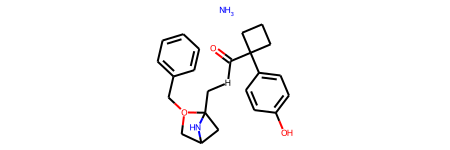

In [383]:
mol

In [ ]:
cgparams = rdCoordGen.CoordGenParams()
cgparams.minimizerPrecision = cgparams.sketcherBestPrecision
rdCoordGen.AddCoords(mol, cgparams)
mol

In [ ]:
type(b_pair[3][0][0])

In [ ]:
fig, ax = plt.subplots(2, 4, figsize=(24, 10))
ax[0, 0].imshow(image[0, 0].detach().numpy())
ax[0, 1].imshow(out[0, 1])
ax[0, 2].imshow(out[0, 2])
ax[0, 3].imshow(out[0, 3])
ax[1, 0].imshow(out[0, 4])
ax[1, 1].imshow(out[0, 5])
ax[1, 2].imshow(out[0, 6])
ax[1, 3].imshow(out[0, 7])

In [ ]:
# for i in contours[1]: plt.scatter(i[0], i[1], s=4200, c='none', edgecolors='k', alpha=0.2)
k = 0
for i in contours[1]: plt.scatter(i[0], i[1], c='k', alpha=0.5)
for i in contours[1]: plt.text(i[0], i[1], k); k += 1
k = 0
# for i in contours[2]: plt.scatter(i[0], i[1], s=4200, c='none', edgecolors='b', alpha=0.2)
for i in contours[2]: plt.scatter(i[0], i[1], c='b', alpha=0.5)
for i in contours[2]: plt.text(i[0], i[1], k); k += 1
k = 0
for i in contours[6]: plt.scatter(i[0], i[1], c='gray', alpha=0.5)
for i in contours[6]: plt.text(i[0], i[1], k, c='gray'); k += 1